# Assignments: Cleaning Data

## 1. Data in Python Request

* Read in data from the Excel spreadsheet (Alarm Survey Data.xlsx) and put into a Pandas DataFrame
* Check the data type of each column
* Convert object columns into numeric or datetime columns, as needed

In [2]:
import pandas as pd
df = pd.read_excel('../data/Alarm Survey Data.xlsx')
df.head()


,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3.0,active,3.0,1,5 stars
1,2,31,3.0,light,3.0,3,3 stars
2,3,18,0.0,light_activity,4.0,1,1 stars
3,4,42,4.0,active,4.0,1,4 stars
4,5,30,1.0,light_activity,1.0,4,3 stars


In [3]:
print(df.shape)
df.info()

(6433, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   survey_id           6433 non-null   int64  
 1   age                 6433 non-null   int64  
 2   number_of_children  6433 non-null   float64
 3   activity_level      6433 non-null   object 
 4   sleep_quality       6082 non-null   float64
 5   number_of_snoozes   6433 non-null   int64  
 6   alarm_rating        6433 non-null   object 
dtypes: float64(2), int64(3), object(2)
memory usage: 351.9+ KB


In [4]:
df.alarm_rating = df.alarm_rating.str.replace(' stars', '') # Remove ' stars' from the string
df.alarm_rating = pd.to_numeric(df.alarm_rating) # Convert to numeric (float by default)
df.alarm_rating = df.alarm_rating.astype('int64') # Convert to integer
df.head()

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3.0,active,3.0,1,5
1,2,31,3.0,light,3.0,3,3
2,3,18,0.0,light_activity,4.0,1,1
3,4,42,4.0,active,4.0,1,4
4,5,30,1.0,light_activity,1.0,4,3


In [5]:
df.describe() 
# number_of_children has a maximum of 5.5, which is not possible. What does it mean ? More that 5 children (a lot !) or just a typo ?

,survey_id,age,number_of_children,sleep_quality,number_of_snoozes,alarm_rating
count,6433.000000,6433.000000,6433.000000,6082.000000,6433.000000,6433.000000
mean,3216.302192,29.069175,1.395616,4.232654,1.145811,2.955075
std,1856.007409,7.472048,1.432192,0.842448,1.599481,1.101363
min,1.000000,13.000000,0.000000,1.000000,0.000000,1.000000
25%,1609.000000,23.000000,0.000000,4.000000,0.000000,2.000000
50%,3217.000000,28.000000,1.000000,4.000000,0.000000,3.000000
75%,4825.000000,34.000000,2.000000,5.000000,2.000000,4.000000
max,6366.000000,47.000000,5.500000,5.000000,19.000000,5.000000


In [6]:
df.number_of_children.value_counts() # We see that 5.5 is not a typo as it appears 204 times, so it just means 5 or more children.

number_of_children
0.0    2440
2.0    1498
1.0    1172
3.0     788
4.0     331
5.5     204
Name: count, dtype: int64

In [7]:
df.head() # we should not convert the number_of_children collumn to integer as we would lose the information that 204 people have 5 or more children.

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3.0,active,3.0,1,5
1,2,31,3.0,light,3.0,3,3
2,3,18,0.0,light_activity,4.0,1,1
3,4,42,4.0,active,4.0,1,4
4,5,30,1.0,light_activity,1.0,4,3


In [8]:
df.sleep_quality = pd.to_numeric(df.sleep_quality)
# pd.to_numeric -> Can Handle NaN values. Converts to float by default.
df.head()

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3.0,active,3.0,1,5
1,2,31,3.0,light,3.0,3,3
2,3,18,0.0,light_activity,4.0,1,1
3,4,42,4.0,active,4.0,1,4
4,5,30,1.0,light_activity,1.0,4,3


## 2. Missing Data Check

* Find any missing data
* Deal with the missing data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   survey_id           6433 non-null   int64  
 1   age                 6433 non-null   int64  
 2   number_of_children  6433 non-null   float64
 3   activity_level      6433 non-null   object 
 4   sleep_quality       6082 non-null   float64
 5   number_of_snoozes   6433 non-null   int64  
 6   alarm_rating        6433 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 351.9+ KB


In [10]:
df['sleep_quality'].isna().sum() # Number of Nan values 0

351

In [11]:
df.sleep_quality.value_counts(dropna=False)

sleep_quality
5.0    2721
4.0    2261
3.0     997
NaN     351
1.0     103
Name: count, dtype: int64

In [12]:
df.sleep_quality.fillna(2, inplace=True)
df['sleep_quality'] = df.sleep_quality.astype('int64')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   survey_id           6433 non-null   int64  
 1   age                 6433 non-null   int64  
 2   number_of_children  6433 non-null   float64
 3   activity_level      6433 non-null   object 
 4   sleep_quality       6433 non-null   int64  
 5   number_of_snoozes   6433 non-null   int64  
 6   alarm_rating        6433 non-null   int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 351.9+ KB


## 3. Inconsistent Text & Typos Check

* Find any inconsistent text and typos
* Deal with the inconsistent text and typos

In [14]:
df.head()

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3.0,active,3,1,5
1,2,31,3.0,light,3,3,3
2,3,18,0.0,light_activity,4,1,1
3,4,42,4.0,active,4,1,4
4,5,30,1.0,light_activity,1,4,3


In [15]:
df['activity_level'].value_counts()

activity_level
active            2450
lightly active    2289
light_activity     691
very active        669
light              334
Name: count, dtype: int64

In [16]:
import numpy as np
df.activity_level = np.where( df.activity_level == 'light', 'lightly active', df.activity_level)
df.activity_level = np.where( df.activity_level == 'light_activity', 'lightly active', df.activity_level)

In [17]:
# Alternative way to replace values
#activity_map = {'light': 'lightly active', 'light_activity': 'lightly active'}
#df.activity_level = df.activity_level.map(activity_map)

In [18]:
df.head()

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3.0,active,3,1,5
1,2,31,3.0,lightly active,3,3,3
2,3,18,0.0,lightly active,4,1,1
3,4,42,4.0,active,4,1,4
4,5,30,1.0,lightly active,1,4,3


## 4. Duplicate Data Check

* Find any duplicate data
* Deal with the duplicate data

In [19]:
df.duplicated().sum() # Number of duplicated rows

67

In [20]:
df[df.duplicated(keep=False)] # Show duplicated rows

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
6299,6300,31,2.0,active,5,0,3
6300,6301,27,2.0,lightly active,4,0,2
6301,6302,41,3.0,lightly active,5,0,2
6302,6303,25,0.0,lightly active,5,0,5
6303,6304,25,1.0,lightly active,5,0,2
...,...,...,...,...,...,...,...
6428,6362,27,2.0,active,5,0,5
6429,6363,31,1.0,lightly active,4,0,4
6430,6364,26,0.0,lightly active,5,0,3
6431,6365,27,1.0,active,5,0,3


In [21]:
df.drop_duplicates(inplace=True) # Drop duplicated rows

In [22]:
df.duplicated().sum() # Number of duplicated rows

0

In [23]:
df.reset_index(drop=True, inplace=True) # Reset index. drop=True to not add old index as a column ,while Inplace=True to modify the dataframe directly.

## 5. Outliers Check

* Find any outliers
* Deal with the outliers

array([[<Axes: title={'center': 'survey_id'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'number_of_children'}>,
        <Axes: title={'center': 'sleep_quality'}>],
       [<Axes: title={'center': 'number_of_snoozes'}>,
        <Axes: title={'center': 'alarm_rating'}>]], dtype=object)

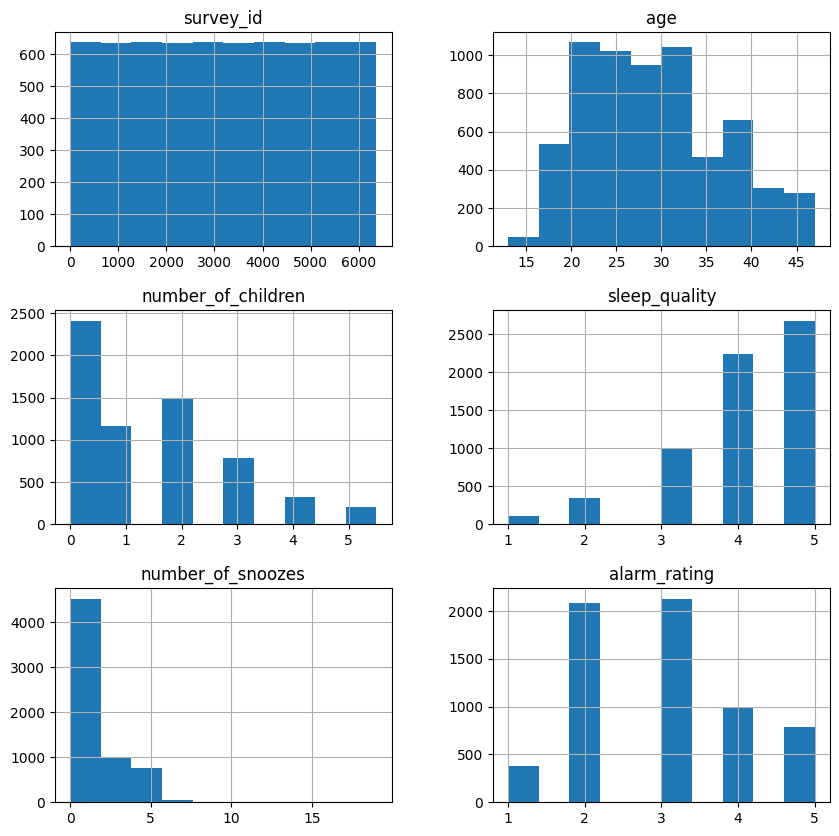

In [24]:
df.hist(figsize=(10,10)) # Histograms of all numerical columns

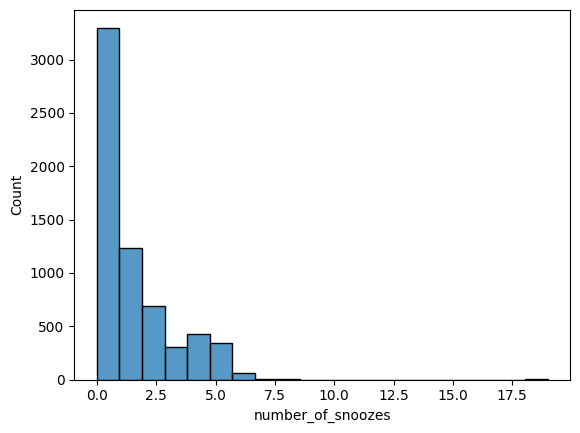

In [25]:
import seaborn as sns
sns.histplot(df.number_of_snoozes, bins=20); # Histogram of number_of_snoozes with seaborn

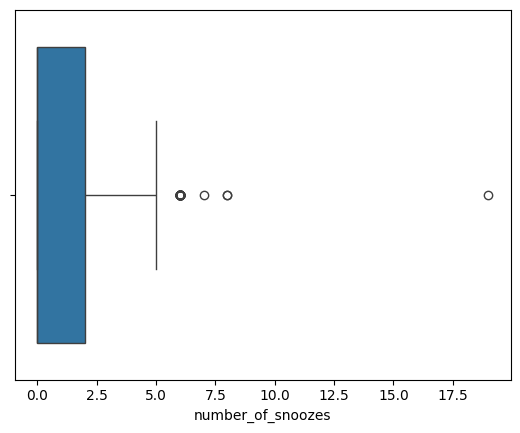

In [26]:
sns.boxplot(x=df.number_of_snoozes); # Boxplot

In [27]:
df['number_of_snoozes'].value_counts() # One certain outlier at 19 snoozes

number_of_snoozes
0     3300
1     1229
2      693
4      427
5      345
3      309
6       59
8        2
19       1
7        1
Name: count, dtype: int64

In [28]:
df = df[df.number_of_snoozes < 19]

In [29]:
df.head()

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3.0,active,3,1,5
1,2,31,3.0,lightly active,3,3,3
2,3,18,0.0,lightly active,4,1,1
3,4,42,4.0,active,4,1,4
4,5,30,1.0,lightly active,1,4,3


## 6. Data Issues Check

* Quickly explore the updated DataFrame. How do things look now after handling the data issues compared to the original DataFrame?

In [30]:
# Check for missing data
df[df.isna().any(axis=1)] # Show rows with NaN values

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating


In [31]:
# Check for inconsistencies in the data
df.activity_level.value_counts()

activity_level
lightly active    3287
active            2422
very active        656
Name: count, dtype: int64

In [32]:
# Check for duplicated rows
df[df.duplicated(keep=False)] # Show duplicated rows

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating


In [33]:
df.describe()

,survey_id,age,number_of_children,sleep_quality,number_of_snoozes,alarm_rating
count,6365.000000,6365.000000,6365.000000,6365.000000,6365.000000,6365.000000
mean,3183.882325,29.076826,1.396936,4.107620,1.155067,2.955224
std,1837.741432,7.476376,1.433575,0.963612,1.587979,1.100414
min,1.000000,13.000000,0.000000,1.000000,0.000000,1.000000
25%,1593.000000,23.000000,0.000000,4.000000,0.000000,2.000000
50%,3184.000000,28.000000,1.000000,4.000000,0.000000,3.000000
75%,4775.000000,34.000000,2.000000,5.000000,2.000000,4.000000
max,6366.000000,47.000000,5.500000,5.000000,8.000000,5.000000


In [34]:
df.head()

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3.0,active,3,1,5
1,2,31,3.0,lightly active,3,3,3
2,3,18,0.0,lightly active,4,1,1
3,4,42,4.0,active,4,1,4
4,5,30,1.0,lightly active,1,4,3


## 7. Create Columns From Numeric Data

* Read data into Python
* Check the data type of each column
* Create a numeric column using arithmetic
    - Create a “Total Spend” column that includes both the pen cost and shipping cost for each sale
* Create a numeric column using conditional logic
    - Create a “Free Shipping” column that says yes if the sale included free shipping, and no otherwise

In [35]:
import pandas as pd
import numpy as np
df_1 = pd.read_excel('../data/Pen Sales Data.xlsx')
df_1.dtypes

Customer                  int64
Item                     object
Pen Cost                float64
Shipping Cost           float64
Purchase Date    datetime64[ns]
Delivery Date    datetime64[ns]
Review                   object
dtype: object

In [36]:
df_1.head()

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Review
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,"DoodleWithMe|I love the way this pen writes, b..."
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,ScribbleMaster|The classic Sharpie marker has ...
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,PenPalForever|The retractable ballpoint pen ha...
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,TheWriteWay|This gel pen has a comfortable gri...
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,PenAndPaperPerson|The rollerball pen has a smo...


In [37]:
# Create a “Total Spend” column that includes both the pen cost and shipping cost for each sale
df_1['Total Spend'] = df_1['Pen Cost'] + df_1['Shipping Cost']
df_1.head()

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Review,Total Spend
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,"DoodleWithMe|I love the way this pen writes, b...",8.98
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,ScribbleMaster|The classic Sharpie marker has ...,12.99
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,PenPalForever|The retractable ballpoint pen ha...,11.94
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,TheWriteWay|This gel pen has a comfortable gri...,8.98
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,PenAndPaperPerson|The rollerball pen has a smo...,14.98


In [38]:
# Create a “Free Shipping” column that says yes if the sale included free shipping, and no otherwise
df_1['Free Shipping'] = np.where(df_1['Shipping Cost'] == 0, 'Yes', 'No')
# Or
# df_1['Free Shipping'] = df_1['Shipping Cost'].apply(lambda x: 'Yes' if x == 0 else 'No')
df_1.head()

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Review,Total Spend,Free Shipping
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,"DoodleWithMe|I love the way this pen writes, b...",8.98,No
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,ScribbleMaster|The classic Sharpie marker has ...,12.99,Yes
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,PenPalForever|The retractable ballpoint pen ha...,11.94,No
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,TheWriteWay|This gel pen has a comfortable gri...,8.98,No
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,PenAndPaperPerson|The rollerball pen has a smo...,14.98,No


## 8. Create Columns From DateTime Data

* Calculate the difference between two datetime columns and save it as a new column
* Take the average of a column

In [39]:
df_1.dtypes

Customer                  int64
Item                     object
Pen Cost                float64
Shipping Cost           float64
Purchase Date    datetime64[ns]
Delivery Date    datetime64[ns]
Review                   object
Total Spend             float64
Free Shipping            object
dtype: object

In [40]:
# Calculate the number of days between the purchase and delivery date for each sale
# Save it as a new column called “Delivery Time”
df_1['Delivery Time'] = df_1['Delivery Date'].dt.day - df_1['Purchase Date'].dt.day
df_1.head()

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Review,Total Spend,Free Shipping,Delivery Time
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,"DoodleWithMe|I love the way this pen writes, b...",8.98,No,2
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,ScribbleMaster|The classic Sharpie marker has ...,12.99,Yes,3
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,PenPalForever|The retractable ballpoint pen ha...,11.94,No,1
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,TheWriteWay|This gel pen has a comfortable gri...,8.98,No,3
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,PenAndPaperPerson|The rollerball pen has a smo...,14.98,No,2


In [41]:
# Average days from purchase to delivery
df_1['Delivery Time'].mean()

3.24

## 9. Create Columns From Text Data

* Split one column into multiple columns
* Create a Boolean column (True / False) to show whether a text field contains particular words

In [42]:
# Split the reviews on the “|” character to create two new columns: “User Name” and “Review Text”
df_1[['User Name', 'Review Text']] = df_1['Review'].str.split('|', expand=True)
# expand = True means to return a DataFrame

In [43]:
# Create a “Leak or Spill” column that flags the reviews that mention either “leak” or “spill”
df_1['Leak or Spill'] = df_1['Review Text'].str.contains('leak|spill', case=False, regex=True) 
# regex=True to use regular expressions. Here we use | to denote the OR operator.

In [44]:
df_1.head()

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Review,Total Spend,Free Shipping,Delivery Time,User Name,Review Text,Leak or Spill
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,"DoodleWithMe|I love the way this pen writes, b...",8.98,No,2,DoodleWithMe,"I love the way this pen writes, but unfortunat...",True
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,ScribbleMaster|The classic Sharpie marker has ...,12.99,Yes,3,ScribbleMaster,"The classic Sharpie marker has a bold, permane...",False
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,PenPalForever|The retractable ballpoint pen ha...,11.94,No,1,PenPalForever,"The retractable ballpoint pen has a durable, m...",False
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,TheWriteWay|This gel pen has a comfortable gri...,8.98,No,3,TheWriteWay,This gel pen has a comfortable grip and writes...,False
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,PenAndPaperPerson|The rollerball pen has a smo...,14.98,No,2,PenAndPaperPerson,"The rollerball pen has a smooth, fluid feel an...",False


In [45]:
df_1.drop(columns=['Review'], inplace=True) # Drop the original Review column

In [46]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Customer       25 non-null     int64         
 1   Item           25 non-null     object        
 2   Pen Cost       25 non-null     float64       
 3   Shipping Cost  25 non-null     float64       
 4   Purchase Date  25 non-null     datetime64[ns]
 5   Delivery Date  25 non-null     datetime64[ns]
 6   Total Spend    25 non-null     float64       
 7   Free Shipping  25 non-null     object        
 8   Delivery Time  25 non-null     int32         
 9   User Name      25 non-null     object        
 10  Review Text    25 non-null     object        
 11  Leak or Spill  25 non-null     bool          
dtypes: bool(1), datetime64[ns](2), float64(3), int32(1), int64(1), object(4)
memory usage: 2.2+ KB
